# Infantes (data set sin edad 0)

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/con_inconsistencias/general/full.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento', 'fecha_de_nacimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

infantes = df[(df["edad"] > 0.0) & (df["edad"] < 13)].copy()

In [3]:
infantes['year_reporte'] = infantes['fecha_reporte'].dt.year
infantes["dias_de_busqueda_reporte"] = infantes["fecha_de_localizacion"] - infantes["fecha_reporte"]
infantes["dias_de_busqueda_evento"] = infantes["fecha_de_localizacion"] - infantes["fecha_evento"]
infantes['year_birthday'] = infantes['fecha_de_nacimiento'].dt.year
infantes[["year_reporte", "year_birthday","dias_de_busqueda_reporte","dias_de_busqueda_evento"]].head()

,year_reporte,year_birthday,dias_de_busqueda_reporte,dias_de_busqueda_evento
19,2012,NaN,79 days 08:30:00,86 days 04:30:00
36,2012,2000.0,-142 days +04:10:00,13 days 02:30:00
39,2012,2000.0,-149 days +12:45:00,-58 days +18:20:00
51,2012,2000.0,-177 days +08:30:00,-177 days +00:00:00
60,2012,NaN,0 days 10:45:00,0 days 11:00:00


In [4]:
len(infantes)

6901

In [5]:
infantes.year_birthday.describe()

count    6734.000000
mean     2005.006386
std         9.851117
min      1753.000000
25%      2000.000000
50%      2005.000000
75%      2010.000000
max      2062.000000
Name: year_birthday, dtype: float64

In [6]:
infantes.year_birthday.value_counts()

2000.0    1382
2003.0     433
2005.0     420
2004.0     400
2002.0     385
2012.0     320
2010.0     316
2013.0     315
2011.0     314
2007.0     307
2008.0     292
2009.0     281
2001.0     273
2006.0     273
2014.0     246
2015.0     180
1999.0     126
2016.0     114
1996.0      76
1997.0      72
1998.0      61
1995.0      53
1994.0      24
2017.0      23
1990.0      18
1899.0      12
1753.0       5
1993.0       3
1984.0       2
1991.0       2
1992.0       2
1989.0       1
1976.0       1
1975.0       1
2062.0       1
Name: year_birthday, dtype: int64

In [7]:
infantes.drop(infantes[(infantes['year_birthday'] < 1977)].index, inplace=True)
infantes.drop(infantes[(infantes['year_birthday'] == 2062)].index, inplace=True)

In [8]:
len(infantes)

6881

In [9]:
infantes[infantes['year_birthday']== 1984][['year_birthday','year_reporte','edad']]

,year_birthday,year_reporte,edad
23083,1984.0,2011,5.0
55466,1984.0,2009,12.0


In [10]:
infantes.drop(infantes[(infantes['year_birthday'] == 1984)].index, inplace=True)

In [11]:
infantes[infantes['year_birthday']== 1990][['year_birthday','year_reporte','edad']]

,year_birthday,year_reporte,edad
1395,1990.0,2009,11.0
10811,1990.0,2013,3.0
11352,1990.0,2011,11.0
13865,1990.0,2013,8.0
20503,1990.0,2009,12.0
37219,1990.0,2014,10.0
43309,1990.0,2014,9.0
47034,1990.0,2007,10.0
47101,1990.0,2007,5.0
47102,1990.0,2007,3.0


In [12]:
infantes["edad_calculada"] = infantes["year_reporte"] - infantes["year_birthday"]

In [13]:
infantes[infantes['year_birthday']== 1990][['year_birthday','year_reporte','edad','edad_calculada']]

,year_birthday,year_reporte,edad,edad_calculada
1395,1990.0,2009,11.0,19.0
10811,1990.0,2013,3.0,23.0
11352,1990.0,2011,11.0,21.0
13865,1990.0,2013,8.0,23.0
20503,1990.0,2009,12.0,19.0
37219,1990.0,2014,10.0,24.0
43309,1990.0,2014,9.0,24.0
47034,1990.0,2007,10.0,17.0
47101,1990.0,2007,5.0,17.0
47102,1990.0,2007,3.0,17.0


In [14]:
infantes.drop(infantes[(infantes['year_birthday'] == 1990)].index, inplace=True)

In [15]:
infantes.edad_calculada.value_counts()

 12.0    949
 13.0    908
 11.0    593
 3.0     416
 2.0     413
 10.0    407
 9.0     362
 4.0     359
 8.0     350
 6.0     323
 7.0     321
 1.0     319
 5.0     318
 14.0    232
 0.0     112
 17.0     99
 16.0     93
 15.0     64
 18.0     24
-2.0      10
-1.0       5
 19.0      4
-3.0       4
 21.0      3
 20.0      2
 23.0      2
 22.0      1
 24.0      1
Name: edad_calculada, dtype: int64

In [16]:
infantes['year_evento'] = infantes['fecha_evento'].dt.year

In [17]:
infantes[infantes['edad_calculada'] < 0][['year_birthday','year_reporte','year_evento','edad','edad_calculada']]

,year_birthday,year_reporte,year_evento,edad,edad_calculada
2501,2014.0,2011,2011,12.0,-3.0
6843,2011.0,2010,2010,2.0,-1.0
8574,2014.0,2012,2012,7.0,-2.0
9090,2012.0,2010,2010,12.0,-2.0
21844,2013.0,2011,2011,1.0,-2.0
30009,2013.0,2011,2011,1.0,-2.0
33236,2012.0,2010,2010,1.0,-2.0
36254,2013.0,2012,2012,1.0,-1.0
42312,2013.0,2012,2012,1.0,-1.0
45718,2013.0,2011,2011,1.0,-2.0


In [18]:
infantes.drop(infantes[(infantes['edad_calculada'] < 0)].index, inplace=True)

In [19]:
infantes[(infantes['edad_calculada'] > 13)][['year_birthday','year_reporte','year_evento','edad','edad_calculada']].T

,1646,2737,10097,10291,10321,10325,10381,10480,10525,10557,...,98470,98616,98663,98681,98807,98864,98865,98901,98934,98949
year_birthday,1997.0,1992.0,1994.0,1996.0,1996.0,1996.0,1996.0,1995.0,1995.0,1996.0,...,2000.0,2000.0,2000.0,2000.0,2004.0,2000.0,2000.0,2000.0,2000.0,2000.0
year_reporte,2012.0,2011.0,2013.0,2013.0,2013.0,2013.0,2013.0,2012.0,2012.0,2013.0,...,2017.0,2017.0,2018.0,2018.0,2018.0,2018.0,2018.0,2016.0,2016.0,2016.0
year_evento,2012.0,2010.0,2013.0,2013.0,2013.0,2013.0,2013.0,2012.0,2012.0,2013.0,...,2017.0,2017.0,2018.0,2018.0,2018.0,2018.0,2018.0,2016.0,2016.0,2016.0
edad,12.0,12.0,12.0,11.0,4.0,11.0,1.0,6.0,3.0,10.0,...,8.0,10.0,6.0,6.0,8.0,7.0,9.0,9.0,9.0,2.0
edad_calculada,15.0,19.0,19.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,...,17.0,17.0,18.0,18.0,14.0,18.0,18.0,16.0,16.0,16.0


In [20]:
infantes.drop(infantes[(infantes['edad_calculada'] > 13)].index, inplace=True)

In [21]:
infantes.edad_calculada.value_counts()

12.0    949
13.0    908
11.0    593
3.0     416
2.0     413
10.0    407
9.0     362
4.0     359
8.0     350
6.0     323
7.0     321
1.0     319
5.0     318
0.0     112
Name: edad_calculada, dtype: int64

In [22]:
infantes[(infantes['edad_calculada'] == 0.0)][['year_birthday','year_reporte','year_evento','edad','edad_calculada']].T

,197,568,4115,5129,6608,6702,7054,8021,8952,10327,...,93947,93975,94328,94457,94692,96741,97296,97340,97868,98661
year_birthday,2012.0,2011.0,2012.0,2011.0,2013.0,2010.0,2010.0,2008.0,2009.0,2013.0,...,2015.0,2015.0,2017.0,2015.0,2015.0,2016.0,2016.0,2017.0,2017.0,2017.0
year_reporte,2012.0,2011.0,2012.0,2011.0,2013.0,2010.0,2010.0,2008.0,2009.0,2013.0,...,2015.0,2015.0,2017.0,2015.0,2015.0,2016.0,2016.0,2017.0,2017.0,2017.0
year_evento,2012.0,2011.0,2012.0,2011.0,2013.0,2010.0,2010.0,2008.0,2009.0,2013.0,...,2015.0,2015.0,2017.0,2015.0,2015.0,2016.0,2016.0,2017.0,2017.0,2017.0
edad,6.0,1.0,1.0,11.0,2.0,4.0,3.0,8.0,4.0,1.0,...,5.0,12.0,6.0,1.0,1.0,1.0,1.0,1.0,3.0,10.0
edad_calculada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
infantes.drop(infantes[(infantes['edad_calculada'] == 0.0)].index, inplace=True)

In [24]:
infantes.edad_calculada.value_counts()

12.0    949
13.0    908
11.0    593
3.0     416
2.0     413
10.0    407
9.0     362
4.0     359
8.0     350
6.0     323
7.0     321
1.0     319
5.0     318
Name: edad_calculada, dtype: int64

In [25]:
infantes[(infantes['edad_calculada'] != infantes['edad'])][['year_birthday','year_reporte','year_evento','edad','edad_calculada']].T

,19,36,39,51,60,80,94,122,170,185,...,98942,98945,98986,99013,99043,99045,99052,99053,99068,99126
year_birthday,NaN,2000.0,2000.0,2000.0,NaN,2000.0,2000.0,1997.0,2001.0,NaN,...,2004.0,2005.0,2012.0,2006.0,2010.0,2008.0,2012.0,2010.0,2007.0,2016.0
year_reporte,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2011.0,2010.0,2012.0,2007.0,...,2016.0,2017.0,2017.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0
year_evento,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2010.0,2009.0,2012.0,2007.0,...,2016.0,2017.0,2017.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0
edad,12.0,3.0,9.0,4.0,2.0,2.0,9.0,12.0,10.0,10.0,...,11.0,11.0,4.0,11.0,7.0,9.0,5.0,7.0,10.0,1.0
edad_calculada,NaN,12.0,12.0,12.0,NaN,12.0,11.0,13.0,11.0,NaN,...,12.0,12.0,5.0,12.0,8.0,10.0,6.0,8.0,11.0,2.0


In [26]:
infantes["dif_edad"] = infantes["edad_calculada"] - infantes["edad"]
infantes.dif_edad.value_counts()

 0.0     3021
 1.0     2074
-1.0      154
 2.0      106
-2.0       78
-3.0       67
 3.0       56
-4.0       48
 4.0       46
 5.0       45
 9.0       44
 11.0      41
 10.0      41
 6.0       40
 8.0       40
 7.0       38
-5.0       32
 12.0      30
-6.0       11
-9.0       10
-8.0        7
-10.0       7
-7.0        2
Name: dif_edad, dtype: int64

In [27]:
infantes[(infantes['dif_edad'] < -1)][['year_birthday','year_reporte','year_evento','edad','edad_calculada','dif_edad']].T

,1120,2885,3466,3624,3773,3774,3897,3954,4071,4090,...,90279,90558,90582,91415,92489,93630,94073,94744,95586,96105
year_birthday,2003.0,2000.0,2000.0,2000.0,2000.0,2000.0,2007.0,2007.0,2007.0,2008.0,...,2003.0,1999.0,2003.0,2000.0,2015.0,2016.0,2010.0,2016.0,2015.0,2016.0
year_reporte,2009.0,2007.0,2009.0,2009.0,2008.0,2007.0,2011.0,2009.0,2010.0,2011.0,...,2011.0,2007.0,2007.0,2007.0,2016.0,2017.0,2017.0,2017.0,2016.0,2018.0
year_evento,2009.0,2007.0,2009.0,2009.0,2008.0,2006.0,2011.0,2009.0,2010.0,2010.0,...,2011.0,2007.0,2007.0,2007.0,2016.0,2017.0,2017.0,2017.0,2016.0,2018.0
edad,9.0,9.0,12.0,12.0,10.0,12.0,6.0,7.0,7.0,5.0,...,10.0,12.0,8.0,10.0,11.0,6.0,9.0,4.0,10.0,11.0
edad_calculada,6.0,7.0,9.0,9.0,8.0,7.0,4.0,2.0,3.0,3.0,...,8.0,8.0,4.0,7.0,1.0,1.0,7.0,1.0,1.0,2.0
dif_edad,-3.0,-2.0,-3.0,-3.0,-2.0,-5.0,-2.0,-5.0,-4.0,-2.0,...,-2.0,-4.0,-4.0,-3.0,-10.0,-5.0,-2.0,-3.0,-9.0,-9.0


In [28]:
infantes[(infantes['dif_edad'] > 1)][['year_birthday','year_reporte','year_evento','edad','edad_calculada','dif_edad']].T

,36,39,51,80,94,191,549,610,750,821,...,89796,91105,91150,91151,91316,92156,95595,97834,97987,98007
year_birthday,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,1997.0,2003.0,2006.0,2000.0,2000.0
year_reporte,2012.0,2012.0,2012.0,2012.0,2011.0,2012.0,2011.0,2012.0,2010.0,2012.0,...,2013.0,2013.0,2013.0,2013.0,2012.0,2010.0,2015.0,2017.0,2013.0,2012.0
year_evento,2012.0,2012.0,2012.0,2012.0,2010.0,2012.0,2011.0,2012.0,2010.0,2012.0,...,2013.0,2013.0,2000.0,2000.0,2012.0,2010.0,2015.0,2017.0,2013.0,2012.0
edad,3.0,9.0,4.0,2.0,9.0,8.0,1.0,1.0,6.0,10.0,...,3.0,4.0,5.0,1.0,9.0,11.0,1.0,8.0,10.0,2.0
edad_calculada,12.0,12.0,12.0,12.0,11.0,12.0,11.0,12.0,10.0,12.0,...,13.0,13.0,13.0,13.0,12.0,13.0,12.0,11.0,13.0,12.0
dif_edad,9.0,3.0,8.0,10.0,2.0,4.0,10.0,11.0,4.0,2.0,...,10.0,9.0,8.0,12.0,3.0,2.0,11.0,3.0,3.0,10.0


In [29]:
infantes.drop(infantes[(infantes['dif_edad'] < -1)].index, inplace=True)

In [30]:
infantes.drop(infantes[(infantes['dif_edad'] > 1)].index, inplace=True)

# Al Final quedaron:

In [31]:
len(infantes)

5416

# EDA

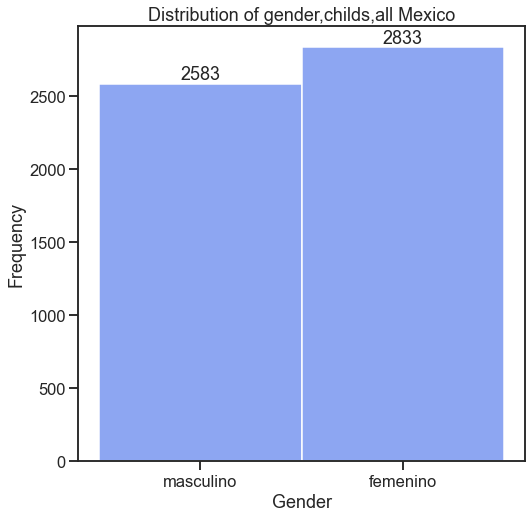

In [32]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,childs,all Mexico')

ax = sns.histplot(infantes.sexo)
ax.bar_label(ax.containers[0])

plt.show()

Text(0.5, 1.0, 'Presuntas Edades')

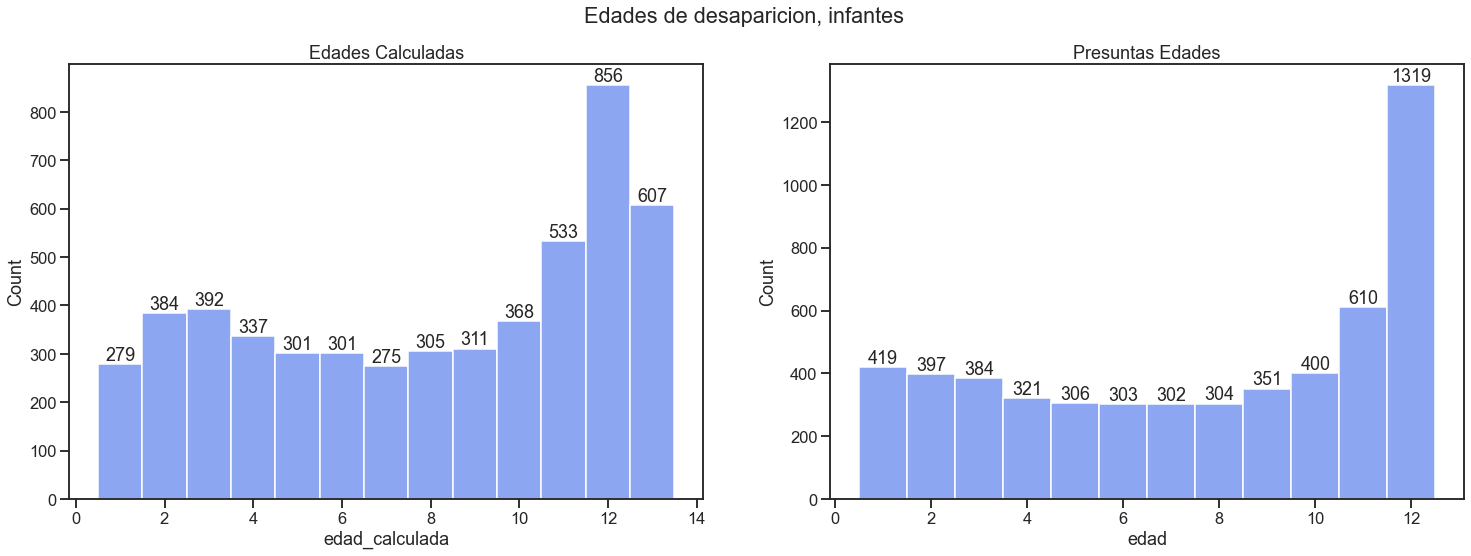

In [33]:
fig, axs = plt.subplots(1, 2,figsize=(25,8))

fig.suptitle('Edades de desaparicion, infantes')

plotUno = sns.histplot(infantes.edad_calculada,discrete='True',ax=axs[0])
plotUno.bar_label(plotUno.containers[0])
axs[0].set_title('Edades Calculadas')

plotDos = sns.histplot(infantes.edad,discrete='True',ax=axs[1])
plotDos.bar_label(plotDos.containers[0])
axs[1].set_title('Edades en registro')

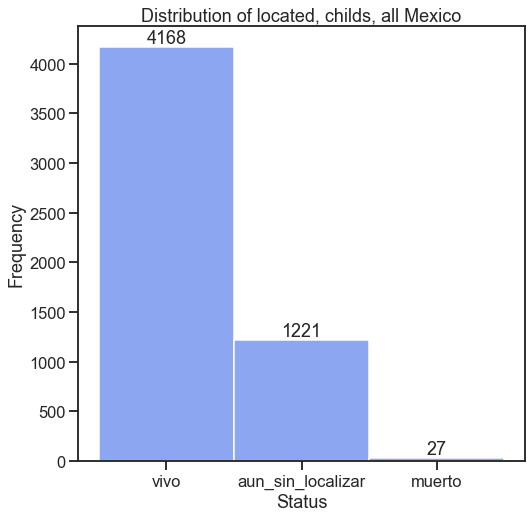

In [34]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of located, childs, all Mexico')

ax = sns.histplot(infantes.vivo_o_muerto)
ax.bar_label(ax.containers[0])

plt.show()

si nuestro total es de 5416, esto quiere decir que: el 76.9% son encontrados vivos, el 0.4% son encontrados muertos y el 22.5% no son encontrados

In [35]:
infantes.edad.value_counts().head()

12.0    1319
11.0     610
1.0      419
10.0     400
2.0      397
Name: edad, dtype: int64

In [36]:
infantes.edad_calculada.value_counts().head()

12.0    856
13.0    607
11.0    533
3.0     392
2.0     384
Name: edad_calculada, dtype: int64

In [37]:
infantes[(infantes["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 2187
aun_sin_localizar     636
muerto                 10
Name: vivo_o_muerto, dtype: int64

In [38]:
infantes[(infantes["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 1981
aun_sin_localizar     585
muerto                 17
Name: vivo_o_muerto, dtype: int64

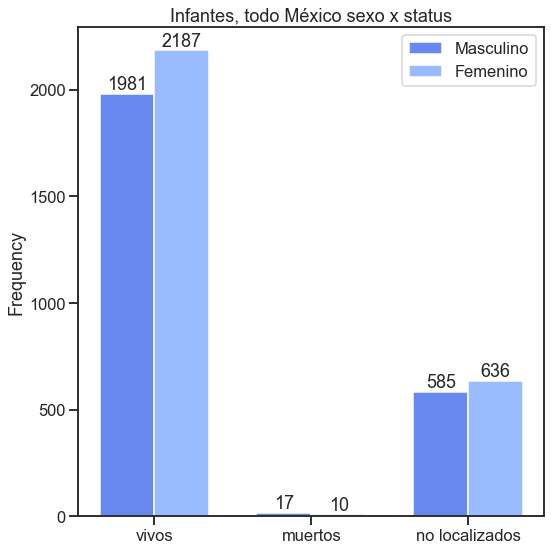

In [39]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [1981,17,585]
women_means = [2187, 10, 636]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Infantes, todo México sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), #(offset x, offset y)
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [40]:
infantes.posible_causa_desaparicion.value_counts().head(15)

no_especificado                510
-1                             479
otros_causas                   360
problemas_familiares           221
problemas_en_su_casa           169
se_fue_de_fiesta_con_amigos     61
se_desconoce                    52
rebeldia                        50
se_fue_con_su_novio             26
por_problemas_familiares        19
por_su_propia_voluntad          19
se_lo_llevo_su_mama             18
problemas_familiares.           18
ausencia_voluntaria             15
se_la_llevo_su_mama             15
Name: posible_causa_desaparicion, dtype: int64

In [41]:
infantes[infantes['edad'] < 4].posible_causa_desaparicion.value_counts().head(15)

-1                                                     156
no_especificado                                         83
otros_causas                                            70
problemas_familiares                                    69
problemas_en_su_casa                                    16
se_la_llevo_su_mama                                      9
se_fue_con_su_madre.                                     7
se_desconoce                                             6
se_fue_por_su_voluntad                                   4
sustraccion_parental_ilegal                              4
se_lo_llevo_su_mama                                      4
menores_de_edad_sustraidos_por_alguno_de_sus_padres      4
por_problemas_familiares                                 4
sustraccion_de_menores                                   3
no_especificado_por_la_persona_que_declara               3
Name: posible_causa_desaparicion, dtype: int64

In [42]:
infantes.condicion_encontrado.value_counts()

buen_estado_de_salud                   2151
no_especificado                        1977
sin_dato                                 28
golpes                                   10
asfixia                                   4
tiro_de_gracia                            2
cortes                                    2
postura_corporal_incómoda                 2
descomposición                            1
baño_con_sustancia_química_caústica       1
ahorcamiento                              1
Name: condicion_encontrado, dtype: int64

In [43]:
infantes[infantes['edad'] < 4].condicion_encontrado.value_counts()

buen_estado_de_salud                   525
no_especificado                        314
sin_dato                                 4
cortes                                   2
tiro_de_gracia                           1
baño_con_sustancia_química_caústica      1
golpes                                   1
ahorcamiento                             1
postura_corporal_incómoda                1
Name: condicion_encontrado, dtype: int64

In [44]:
infantes[infantes['condicion_encontrado'] == 'tiro_de_gracia'][['edad','edad_calculada','year_evento','posible_causa_desaparicion','estado']].T

,32065,57368
edad,3.0,12.0
edad_calculada,3.0,12.0
year_evento,2007,2013
posible_causa_desaparicion,homicidio_doloso,homicidio_doloso
estado,sinaloa,sinaloa


In [45]:
infantes[infantes['condicion_encontrado'] == 'golpes'][['edad','edad_calculada','posible_causa_desaparicion','vivo_o_muerto','estado']].T

,2949,40906,44732,60650,64719,68689,74984,78087,81127,86960
edad,7.0,10.0,11.0,11.0,2.0,11.0,9.0,5.0,12.0,9.0
edad_calculada,7.0,11.0,11.0,12.0,3.0,12.0,10.0,5.0,12.0,9.0
posible_causa_desaparicion,secuestro,lo_tenia_privado_de_la_libertad_un_vecino,lo_tenia_privado_en_vecino,victima_de_delito,NaN,tentativa_de_privacion_ilegal_de_la_libertad,NaN,victima_de_delito,NaN,NaN
vivo_o_muerto,vivo,vivo,vivo,vivo,vivo,vivo,vivo,vivo,vivo,vivo
estado,sinaloa,sinaloa,sinaloa,nuevo_leon,nuevo_leon,nuevo_leon,sinaloa,nuevo_leon,nuevo_leon,nuevo_leon


## Tiempo

In [46]:
infantes.dias_de_busqueda_reporte.value_counts().head(15)

0 days 00:00:00      189
1 days 00:00:00       41
2 days 00:00:00       32
30 days 00:00:00      21
0 days 02:00:00       18
31 days 00:00:00      17
4 days 00:00:00       16
61 days 00:00:00      14
3 days 00:00:00       13
0 days 06:00:00       12
-1 days +00:00:00     12
0 days 04:00:00       11
0 days 01:00:00       11
0 days 03:00:00       11
0 days 10:00:00       11
Name: dias_de_busqueda_reporte, dtype: int64

In [47]:
infantes.dias_de_busqueda_evento.value_counts().head(15)

0 days 00:00:00      76
1 days 00:00:00      47
2 days 00:00:00      38
3 days 00:00:00      29
30 days 00:00:00     21
31 days 00:00:00     20
4 days 00:00:00      20
61 days 00:00:00     16
5 days 00:00:00      16
6 days 00:00:00      13
7 days 00:00:00      13
92 days 00:00:00     12
214 days 00:00:00    11
1 days 09:00:00      11
2 days 01:00:00      11
Name: dias_de_busqueda_evento, dtype: int64

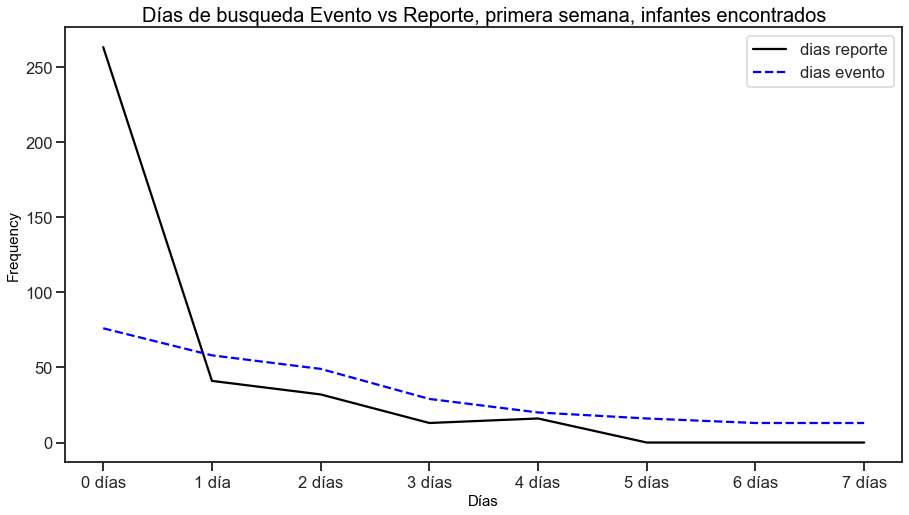

In [48]:
labelsRv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesRv = [263, 41, 32, 13, 16, 0, 0, 0]


labelsEv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesEv = [76, 58, 49, 29, 20, 16, 13, 13]

plt.figure(figsize=(15, 8))

plt.plot(labelsRv,valuesRv,color='black',linestyle='solid', label="dias reporte")
plt.plot(labelsEv,valuesEv,color='blue',linestyle='dashed', label="dias evento")
plt.legend(loc="upper right")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Días',fontdict=font2)
plt.title('Días de busqueda Evento vs Reporte, primera semana, infantes encontrados', fontdict=font1)

plt.show()

In [49]:
infantes["tiempo_perdido"] = infantes["fecha_reporte"] - infantes["fecha_evento"]

In [50]:
infantes.tiempo_perdido.value_counts().head(15)

0 days     295
1 days     206
31 days     94
2 days      78
3 days      53
30 days     44
61 days     36
4 days      31
5 days      28
91 days     25
92 days     19
62 days     16
9 days      13
6 days      13
8 days      12
Name: tiempo_perdido, dtype: int64

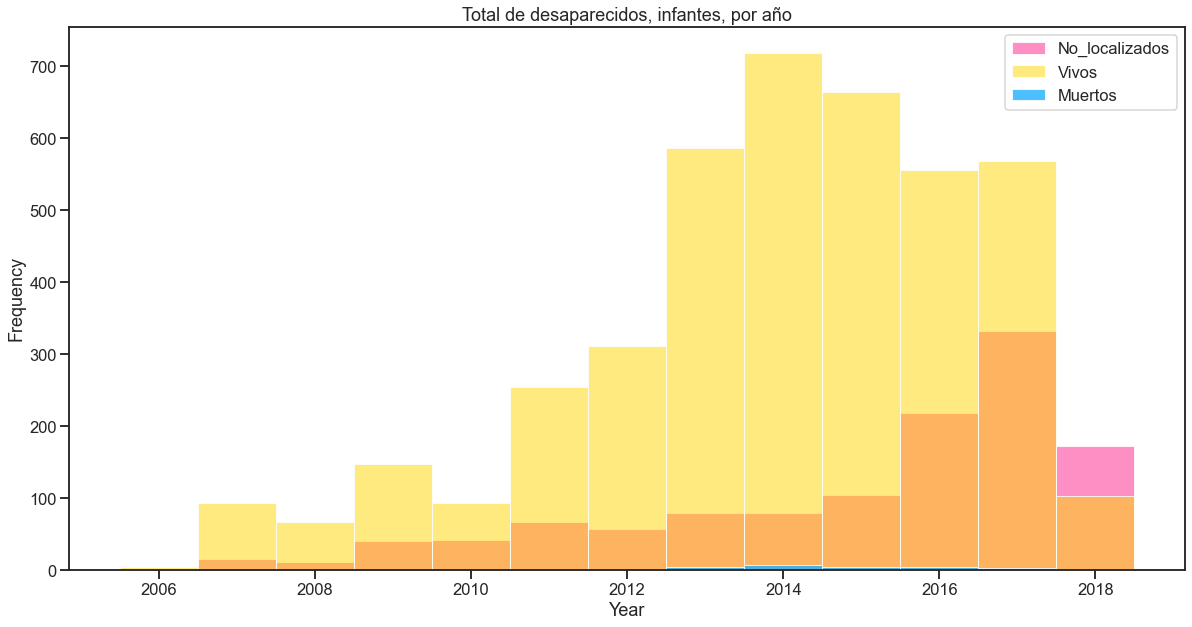

In [51]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(infantes[(infantes["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(infantes[(infantes["vivo_o_muerto"] == "vivo" )].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(infantes[(infantes["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Total de desaparecidos, infantes, por año')

plt.show()

## Data To Import To Tableau

In [52]:
infantes.estado.value_counts()

mexico                 1323
guanajuato             1018
puebla                  375
aguascalientes          284
nuevo_leon              269
chihuahua               247
chiapas                 227
sinaloa                 178
colima                  161
guerrero                159
baja_california         153
tamaulipas              145
ciudad_de_mexico        135
queretaro               129
sonora                   89
jalisco                  86
hidalgo                  77
quintana_roo             75
michoacan                49
durango                  49
veracruz                 43
oaxaca                   30
campeche                 27
morelos                  24
yucatan                  17
tabasco                  12
zacatecas                11
tlaxcala                 10
coahuila                  8
no_especificado           3
san_luis_potosi           1
nayarit                   1
baja_california_sur       1
Name: estado, dtype: int64

In [53]:
import scipy.stats as stats

In [54]:
stats.zscore(infantes.estado.value_counts())

mexico                 4.208232
guanajuato             3.100687
puebla                 0.765763
aguascalientes         0.435315
nuevo_leon             0.380846
chihuahua              0.300957
chiapas                0.228331
sinaloa                0.050398
colima                -0.011334
guerrero              -0.018597
baja_california       -0.040384
tamaulipas            -0.069435
ciudad_de_mexico      -0.105748
queretaro             -0.127536
sonora                -0.272787
jalisco               -0.283681
hidalgo               -0.316363
quintana_roo          -0.323625
michoacan             -0.418039
durango               -0.418039
veracruz              -0.439827
oaxaca                -0.487034
campeche              -0.497928
morelos               -0.508822
yucatan               -0.534241
tabasco               -0.552397
zacatecas             -0.556028
tlaxcala              -0.559660
coahuila              -0.566922
no_especificado       -0.585079
san_luis_potosi       -0.592341
nayarit 

In [55]:
infantes.rename(columns = {'estado_(localizado)':'estado_localizado'}, inplace = True)
infantes['estado_localizado']= infantes['estado_localizado'].replace('estado_de_mexico','mexico')
infantes.to_csv('infantes_usable.csv', index=False)